## second order invariance

Figure 1 and 2

In [15]:
import matplotlib
from tqdm import tqdm
import secorder as sec
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import scipy.stats as st
import torch 
from torch import optim
np.set_printoptions(precision=4)
import pandas as pd
import os

path = os.getcwd() + '\\figures\\'

### Data generation

In [3]:
def sign_data(nt, tau_on = 100, tau_decay = 30,
              scale_decay = 0.3, tau_poisson = 1000):
    # signal is on off
    # stays on for 100 ms, poisson onset times
    data = np.zeros([n_sign,nt])
    
    on_shape = np.ones(tau_on) + scale_decay* \
                      np.exp(-np.linspace(0,tau_on/tau_decay,tau_on))
    
    # for i in range(n_sign):
    times = np.int32(np.random.exponential(scale=tau_poisson,size=2*nt//tau_poisson))
    current = 0
    for tt in times:
        current += tt
        if current+100>=nt:
            break
        data[:,current:current+tau_on] = on_shape
        current += tau_on
    
    data = data + sign_noise_std.reshape(-1,1)*OU(nt,tau=10,nx=n_sign)
    
    data = data*np.array(sig_sign).reshape(-1,1)
    
    return data
    
def OU(nt,tau,nx=1):
    # O.U. data
    x = np.zeros([nx,nt])
    for t in range(0,nt-1):
        x[:,t+1] = x[:,t] + -x[:,t] / tau + \
            (1/np.sqrt(tau/2)) * np.random.randn(nx)
    return x
    
def netw_data(nt, OU_tau = 200, noise = 0.2):
    x = sig_netw*OU(nt,OU_tau,1).repeat(n_netw, axis=0)
    x += noise*np.random.randn(*x.shape)
    return x
    
def back_data(nt):
    return np.random.randn(n_netw,nt)*sig_back
    
def make_data(nt):
    signd = sign_data(nt)
    netwd = netw_data(nt)
    backd = back_data(nt)
    return np.concatenate([signd,netwd,backd],axis=0)

### Plot input - Fig 1-a

In [4]:
np.random.seed(3)

In [5]:
nd = 100000

In [6]:
n_sign = 20
n_netw = 20
n_back = 20

In [7]:
sec.sig_sign = 2.2
sec.sig_netw = 1.2
sec.sig_back = 0.5*np.sqrt(n_sign)
sec.sign_noise_std = np.array(0.1)

In [8]:
d = sec.make_data(nd)
dmean = d.mean(1).reshape(-1,1)
d -= dmean

In [9]:
selection = d[:,2000:3000]

In [10]:
mean_sig = (sec.mean_data*sec.sig_sign)-dmean[:20]

In [11]:
nt = 1000000

[]

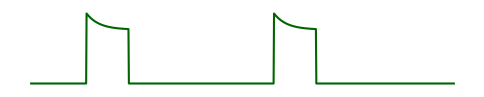

In [12]:
fig0,ax = plt.subplots(1,1,figsize=(6,1))

ax.plot(mean_sig[0,2000:3000],c='darkgreen');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

In [17]:
fig0.savefig(path + 'fig_spike_mean_input.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

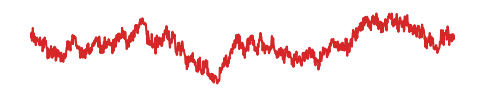

In [18]:
fig02,ax = plt.subplots(1,1,figsize=(6,1))

ax.plot(sec.mean_net[0,2000:3000],c='tab:red');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([]);

In [19]:
fig02.savefig(path + 'fig_spike_mean_input_net.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

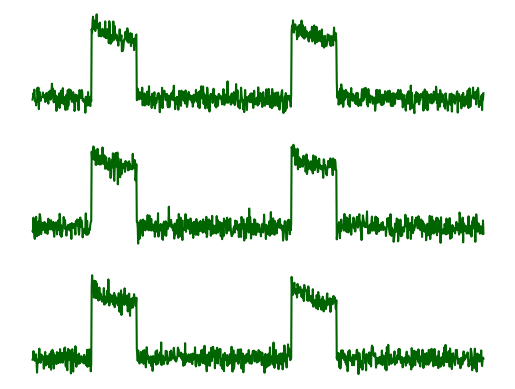

In [20]:
fig1,axs = plt.subplots(3,1)
plt.subplot(311)
plt.plot(selection[0],c='darkgreen');
plt.subplot(312)
plt.plot(selection[1],c='darkgreen');
plt.subplot(313)
plt.plot(selection[2],c='darkgreen');

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [21]:
fig1.savefig(path + 'fig1a_signal.pdf', format='pdf',transparent=True)

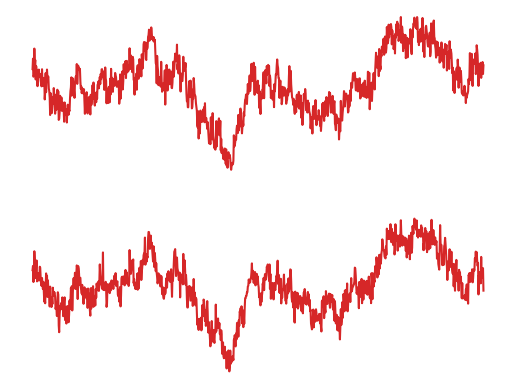

In [22]:
fig2,axs = plt.subplots(2,1)

plt.subplot(211)
plt.plot(d[20,2000:3000], c='tab:red');
plt.subplot(212)
plt.plot(d[21,2000:3000], c='tab:red');

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [23]:
fig2.savefig(path + 'fig1a_network.pdf', format='pdf',transparent=True)

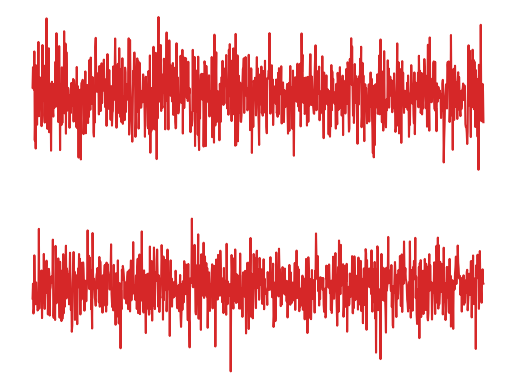

In [24]:
fig3,axs = plt.subplots(2,1)

plt.subplot(211)
plt.plot(d[40,2000:3000], c='tab:red');
plt.subplot(212)
plt.plot(d[41,2000:3000], c='tab:red');

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

In [25]:
fig3.savefig(path + 'fig1a_background.pdf', format='pdf',transparent=True)

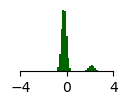

In [26]:
fig4,axs = plt.subplots(1, figsize=(1.2,0.8))

plt.hist(d[0],30,density=True,color='darkgreen');
axs.set_yticks([])
axs.set_xlim([-4,4])
axs.set_xticks([-4,0,4]);
axs.set_ylim([0,1.5])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)

In [27]:
fig4.savefig(path + 'fig1a_hist_sig.pdf', format='pdf',transparent=True,
            bbox_inches = 'tight')

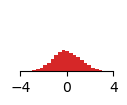

In [28]:
fig5,axs = plt.subplots(1, figsize=(1.2,0.8))

plt.hist(d[20],30,density=True,color='tab:red');

axs.set_yticks([])
axs.set_xlim([-4,4])
axs.set_xticks([-4,0,4]);
axs.set_ylim([0,1])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)

In [29]:
fig5.savefig(path + 'fig1a_hist_netw.pdf', bbox_inches = 'tight',
             format='pdf',transparent=True)

### Learn 

In [30]:
mb = 100

In [31]:
w0 = np.random.randn(60,1)
w0 = w0*(w0>0)

In [32]:
w1,y1,dum,dum,u1 = sec.run_multiple(selection.T, w0=w0, eta_adam = 0.00, permute=False, with_rec=False,
                                    pos_w = True, ny=1, mb=1, nt=selection.shape[1])

nbs: 1000


100%|██████████| 999/999 [00:00<00:00, 2352.83it/s]


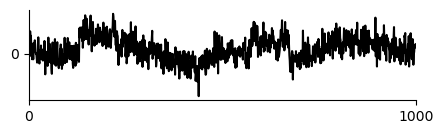

In [34]:
fig6,axs = plt.subplots(3,1,figsize=(5,4))
ax = axs[0]
axs[1].remove()
axs[2].remove()

plt.plot(u1[:,0],c='k');

ax.set_yticks([0])
ax.set_xticks([0,1000]);
ax.set_xlim([0,1000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig6.savefig(path + 'fig1b_initial.pdf', format='pdf',transparent=True)

In [35]:
w2,y2,dum,dum,u2 = sec.run_multiple(d.T, eta_adam = 0.0005, permute=True, 
                                    w0norm = 3, w0=w0, hyk = 5,
                                    with_rec=False, ny=1, 
                                    nt=nt, pos_w = True)

nbs: 10000


100%|██████████| 9999/9999 [00:06<00:00, 1639.74it/s]


In [36]:
w3,y3,dum,dum,u3 = sec.run_multiple(d.T, eta_adam = 0.00,
                    permute=False, with_rec=False, ny=1, mb=1, 
                    nt=d.shape[1], w0=w2[-1])

nbs: 100000


100%|██████████| 99999/99999 [00:33<00:00, 2977.53it/s]


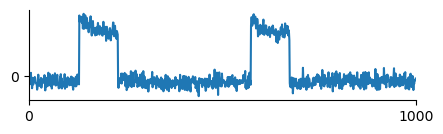

In [37]:
fig7,axs = plt.subplots(3,1,figsize=(5,4))
ax = axs[0]
axs[1].remove()
axs[2].remove()

plt.plot(u3[2000:3000,0]);

ax.set_yticks([0])
ax.set_xticks([0,1000]);
ax.set_xlim([0,1000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [38]:
fig7.savefig(path + 'fig1b_learned.pdf', format='pdf',transparent=True)

### Hetero. LTD

In [39]:
w4,y4,dum,dum,u4 = sec.run_multiple(d.T, eta_adam = 0.0002, permute=True, 
                                    rule="ltp+wd", w_decay=1.5,
                                    w0=w0, w0norm=3,
                                    with_rec=False, ny=1, nt=nt, pos_w=True)

nbs: 10000


100%|██████████| 9999/9999 [00:05<00:00, 1785.85it/s]


In [40]:
w5,y5,dum,dum,u5 = sec.run_multiple(d.T, eta_adam = 0.00,
                    permute=False, with_rec=False, ny=1, mb=1, 
                    nt=d.shape[1], w0=w4[-1])

nbs: 100000


100%|██████████| 99999/99999 [00:36<00:00, 2736.11it/s]


Text(0.5, 0, 'Time (ms)')

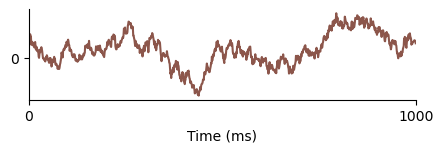

In [41]:
fig8,axs = plt.subplots(3,1,figsize=(5,4))
ax = axs[0]
axs[1].remove()
axs[2].remove()

plt.plot(u5[2000:3000],c='tab:brown');

ax.set_yticks([0])
ax.set_xticks([0,1000]);
ax.set_xlim([0,1000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")

In [42]:
fig8.savefig(path + 'fig1b_control.pdf', bbox_inches = 'tight',
             format='pdf',transparent=True)

kurtosis BCM

In [43]:
wk,yk,dum,dum,uk = sec.run_multiple(d.T, eta_adam = 0.001, permute=True, 
                                    w0norm = 3, w0=w0, hyk = 4,
                                    with_rec=False, ny=1, 
                                    nt=nt, pos_w = True,
                                    rule="bcm_kurt", hy_exp=3
                                      )

nbs: 10000


100%|██████████| 9999/9999 [00:06<00:00, 1632.05it/s]


oja original

In [44]:
woj,yoj,dum,dum,uoj = sec.run_multiple(d.T, eta_adam = 0.001, permute=True, 
                                    w0norm = 3, w0=w0, hyk = 20,
                                    with_rec=False, ny=1, 
                                    nt=nt, pos_w = True,
                                    rule="oja")

oops1
nbs: 10000


100%|██████████| 9999/9999 [00:05<00:00, 1836.00it/s]


### Learning dynamics

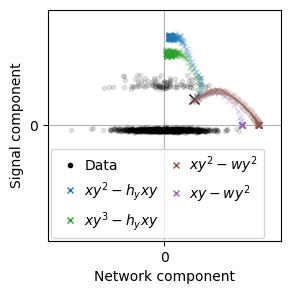

In [45]:
fig9k,axs = plt.subplots(1,1,figsize=[3,3])

fac0 = 0.05
axs.plot(np.sum(d.T[::100,20:40]*fac0,axis=1),
         np.sum(d.T[::100,0:20]*fac0,axis=1),'.k',alpha = 0.1,)

fac = 0.20
step = 100

axs.plot([np.sum(w2[step,20:40])*fac],
        [np.sum(w2[step,0:20])*fac],'x',ms=7,c='k', label="_nolegend_")

axs.plot(np.sum(w2[step::step,20:40],axis=1)*fac,
         np.sum(w2[step::step,0:20],axis=1)*fac,'x',c='tab:blue', alpha=0.3, ms=4)
axs.plot(np.sum(wk[step::step,20:40],axis=1)*fac,
         np.sum(wk[step::step,0:20],axis=1)*fac,'x',c='tab:green', alpha=0.3, ms=4)
axs.plot(np.sum(w4[step::step,20:40],axis=1)*fac,
         np.sum(w4[step::step,0:20],axis=1)*fac,'x',c='tab:brown', alpha=0.3, ms=4)
axs.plot(np.sum(woj[step::step,20:40],axis=1)*fac,
         np.sum(woj[step::step,0:20],axis=1)*fac,'x',c='tab:purple', alpha=0.3, ms=4)

with plt.rc_context({"legend.columnspacing": 0.2,}):
        leg = plt.legend(["Data", r'$x y^2 - h_y x y$', r'$x y^3 - h_y x y$', 
                        r'$x y^2 - w y^2$', r'$x y - w y^2$'],frameon=True,loc='lower left', 
                        prop={'size': 10}, ncol=2, labelspacing=0.5, handletextpad=0.,
                        borderaxespad=0.2)

        for lh in leg.legendHandles: 
                lh.set_alpha(1)

lim = 6

axs.set_xticks([0])
axs.set_yticks([0])
axs.set_xlim(-lim,lim)
axs.set_ylim(-lim,lim)
axs.grid()
axs.set_xlabel(r'Network component')
axs.set_ylabel(r'Signal component')

plt.show()

In [46]:
fig9k.savefig(path + 'fig2a_kurtosis.pdf', format='pdf',transparent=True,bbox_inches = 'tight')

### Different scale

In [47]:
np.random.seed(3)

In [48]:
nd = 1000000

In [49]:
sec.n_sign = 20
sec.n_netw = 20
sec.n_back = 20

In [50]:
scales = [1.5,1.,1.,0.7]
sec.sig_sign = 2.6*np.array(scales).repeat(5)
sec.sign_noise_std = np.array(0.5)
sec.sig_netw = 1.
sec.sig_back = 0.8*np.sqrt(sec.n_sign)

In [51]:
d = sec.make_data(nd)
dmean = d.mean(1).reshape(-1,1)
d -= dmean

In [52]:
selection = d[:,2000:3000]

In [12]:
sec.mean_data.shape

(20, 1000000)

In [53]:
mean_sig = (sec.mean_data*sec.sig_sign.reshape(-1,1))-dmean[:20]

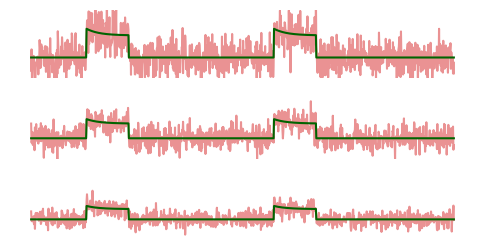

In [54]:
fig10,axs = plt.subplots(3,1, figsize=(6,3))
plt.subplot(311)
plt.plot(selection[0],c='tab:red', alpha=0.5);
plt.plot(mean_sig[0,2000:3000],c='darkgreen');
plt.subplot(312)
plt.plot(selection[10],c='tab:red', alpha=0.5);
plt.plot(mean_sig[10,2000:3000],c='darkgreen');
plt.subplot(313)
plt.plot(selection[15],c='tab:red', alpha=0.5);
plt.plot(mean_sig[15,2000:3000],c='darkgreen');

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-4,8])

In [55]:
fig10.savefig(path + 'fig_scale_input.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [56]:
nt = 100*100000

In [57]:
w0 = np.random.randn(60,1)

In [58]:
wsc,ysc,dum,dum,usc = sec.run_multiple(d.T, eta_adam = 0.003, permute=True, 
                                    w0norm = 3, w0=w0, hyk = 4,
                                    with_rec=False, ny=1, nt=nt, pos_w = True)

nbs: 100000


100%|██████████| 99999/99999 [00:58<00:00, 1706.48it/s]


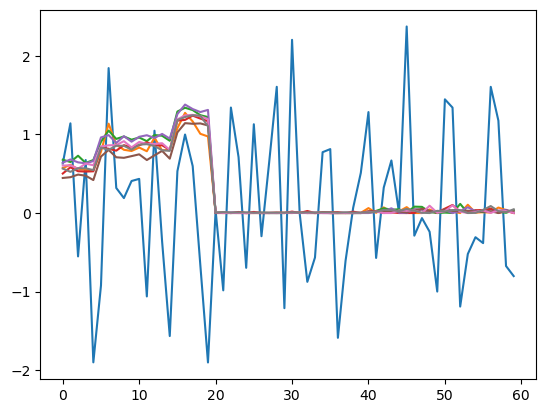

In [31]:
plt.plot(wsc[range(0,nt//200,nt//1600),:,0].T);

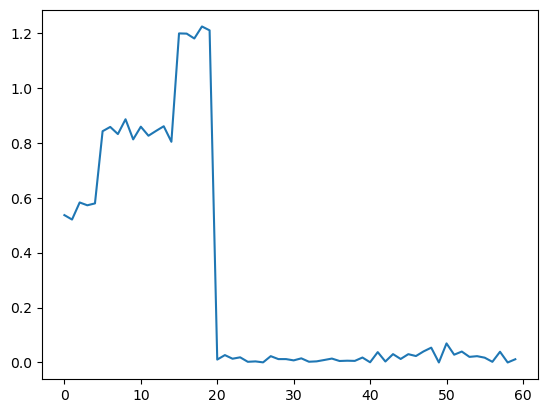

In [32]:
plt.plot(wsc[-1]);

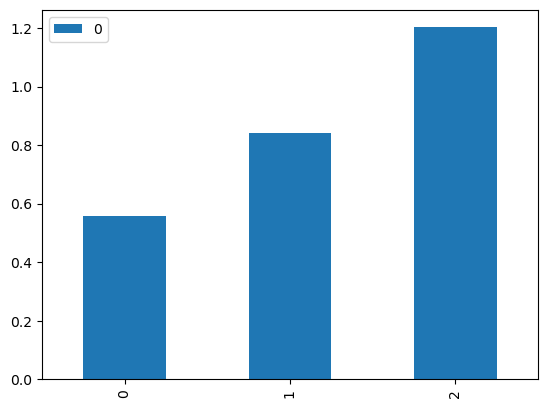

In [33]:
pd.DataFrame([wsc[-1,0:5].mean(), wsc[-1,5:15].mean(), wsc[-1,15:20].mean()]).plot.bar();

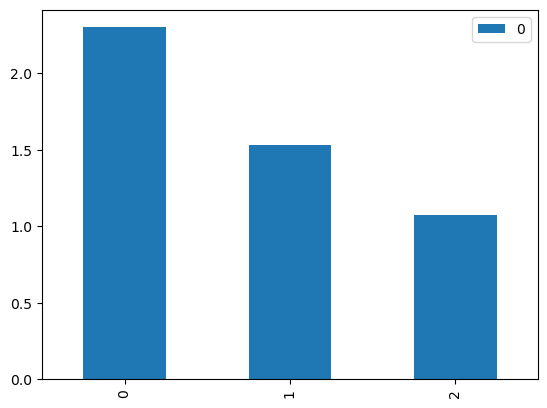

In [34]:
pd.DataFrame([d[0:5].std(), d[5:15].std(), d[15:20].std()]).plot.bar();

In [63]:
stds = d.std(1)
stds[0], stds[10], stds[15]

(2.2978646027320186, 1.5325516938946189, 1.0742049505850753)

In [61]:
mean_std = dmean.std()*2.6

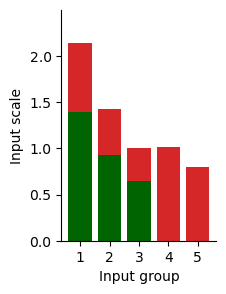

In [64]:
fig11, axs = plt.subplots(1,1,figsize=(2,3))

sig_bar = [sec.sig_sign[0]*mean_std, sec.sig_sign[10]*mean_std, 
                    sec.sig_sign[15]*mean_std]
axs.bar(range(1,4),sig_bar,color='darkgreen')
axs.bar(range(1,4),[0.5*scales[0], 0.5*scales[1], 0.5*scales[3]],
        bottom=sig_bar,color='tab:red')
axs.bar(range(4,6),[stds[20], stds[40]/np.sqrt(20)],color='tab:red');

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks((0,0.5,1,1.5,2));
axs.set_ylim(0,2.5)
axs.set_xticks(range(1,6));
axs.set_ylabel(r'Input scale');
axs.set_xlabel(r'Input group');

In [65]:
fig11.savefig(path + 'fig_scale_input_std.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

In [38]:
wsc.shape

(100000, 60, 1)

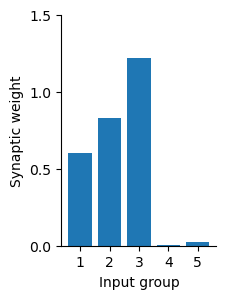

In [67]:
fig12, axs = plt.subplots(1,1,figsize=(2,3))

groups = [wsc[-1,0:6,0].mean(),wsc[-1,6:15,0].mean(),wsc[-1,15:20,0].mean(),
         wsc[-1,20:40,0].mean(), wsc[-1,40:60,0].mean()]
axs.bar(range(1,6),groups,color='tab:blue')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks((0,0.5,1,1.5));
axs.set_xticks(range(1,6));

axs.set_ylabel(r'Synaptic weight');
axs.set_xlabel(r'Input group');

In [68]:
fig12.savefig(path + 'fig_scale_ws.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

In [69]:
w12,y12,dum,dum,u12 = sec.run_multiple(d.T, eta_adam = 0.001, permute=False, 
                                    rule="ltp+wd", w_decay=1.,
                                    w0 = w0, 
                                    with_rec=False, ny=1, nt=nt, pos_w=True)

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:38<00:00, 2589.73it/s]


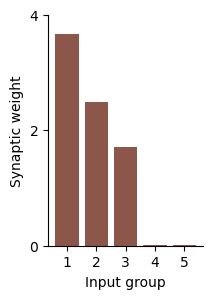

In [70]:
fig13, axs = plt.subplots(1,1,figsize=(2,3))

groups = [w12[-1,0:6,0].mean(),w12[-1,6:15,0].mean(),w12[-1,15:20,0].mean(),
         w12[-1,20:40,0].mean(), w12[-1,40:60,0].mean()]
axs.bar(range(1,6),groups,color='tab:brown')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks((0,2,4));
axs.set_xticks(range(1,6));

axs.set_ylabel(r'Synaptic weight');
axs.set_xlabel(r'Input group');

In [71]:
fig13.savefig(path + 'fig_scale_ws_control.pdf', bbox_inches = 'tight', format='pdf',transparent=True)

### output residual

In [74]:
wsc2,ysc2,dum,dum,usc2 = sec.run_multiple(d.T, eta_adam = 0.00,
                    permute=False, with_rec=False, ny=1, mb=1, 
                    nt=100000, w0=wsc[-1])

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:31<00:00, 3166.03it/s]


In [75]:
ref = mean_sig[0,:100000]
output = usc2[:,0]
output = output/output.std()

In [78]:
a,b,dum,dum,sum = st.linregress(ref,output)
residual = output-a*ref-b
residual.std()

0.32083559837593373

In [76]:
corr1 = np.corrcoef(ref,output)[0,1]
snr1 = corr1**2/(1-corr1**2)
corr1, snr1

(0.9471349000088387, 8.714823192989765)

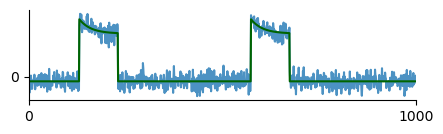

In [79]:
fig71,axs = plt.subplots(3,1,figsize=(5,4))
ax = axs[0]
axs[1].remove()
axs[2].remove()

plt.plot(output[2000:3000],alpha=0.8);
ax.plot(ref[2000:3000]*a+b,c='darkgreen');

ax.set_yticks([0])
ax.set_xticks([0,1000]);
ax.set_xlim([0,1000])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [80]:
fig71.savefig(path + 'fig_scale_output.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

control output

In [81]:
wsc3,ysc3,dum,dum,usc3 = sec.run_multiple(d.T, eta_adam = 0.00,
                    permute=False, with_rec=False, ny=1, mb=1, 
                    nt=100000, w0=w12[-1])

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:35<00:00, 2801.69it/s]


In [82]:
ref = mean_sig[0,:100000]
output2 = usc3[:,0]
output2 = output2/output2.std()

In [83]:
a,b,dum,dum,sum = st.linregress(ref,output2)
residual2 = output2-a*ref-b
residual2.std()

0.36186668593883614

In [84]:
corr2 = np.corrcoef(ref,output2)[0,1]
snr2 = corr2**2/(1-corr2**2)
corr2, snr2

(0.932229854492787, 6.636648368827217)

optimal residual / SNR

In [85]:
x = d[:,:100000]
y = mean_sig[0,:100000]/mean_sig[0,:100000].std()

In [86]:
from sklearn import linear_model

In [ ]:
clf = linear_model.LinearRegression()
clf.fit(x.T,y)

In [88]:
uopt = clf.coef_@x+clf.intercept_

In [89]:
corr3 = np.corrcoef(uopt,y)[0,1]
snr3 = corr3**2/(1-corr3**2)
corr3, snr3

(0.9477802445812769, 8.831622842492916)

In [90]:
residual3 = (uopt-y).std()

In [91]:
ref3 = mean_sig[0,:100000]
output3 = uopt
output3 = output3/output3.std()

In [92]:
a,b,dum,dum,sum = st.linregress(ref3,output3)
residual3 = output3-a*ref3-b
residual3.std()

0.3189241414215298

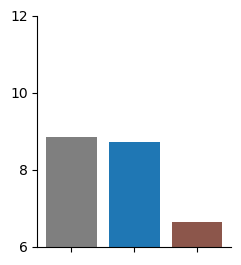

In [93]:
fig172, axs = plt.subplots(1,1,figsize=(2.5,3))

groups = [snr3, snr1, snr2]
axs.bar(range(1,4),groups,color=["tab:gray","tab:blue","tab:brown"])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks((6,8,10,12));
axs.set_xticks(range(1,4));
axs.set_xticklabels([]);
plt.xticks(rotation=-30)
axs.set_ylim(6,12);

In [94]:
fig172.savefig(path + 'fig_scale_snrs.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

### noise varying

In [96]:
np.random.seed(3)

In [97]:
nd = 1000000

In [98]:
noises = [1.5,1.,1.,0.7]
sec.sig_sign = np.array(3.) 
sec.sign_noise_std = np.array(0.5)*np.array(noises).repeat(5)
sec.sig_netw = 1.
sec.sig_back = 0.8*np.sqrt(sec.n_sign)

In [99]:
d = sec.make_data(nd)
dmean = d.mean(1).reshape(-1,1)
d -= dmean

In [100]:
selection = d[:,2000:3000]

In [101]:
mean_sig = (sec.mean_data*sec.sig_sign.reshape(-1,1))-dmean[:20]

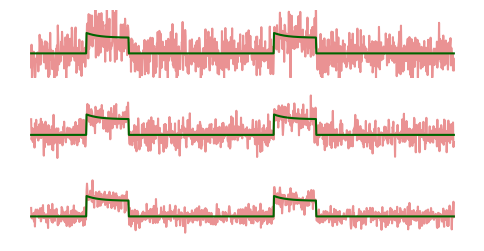

In [102]:
fig20,axs = plt.subplots(3,1,figsize=(6,3))
plt.subplot(311)
plt.plot(selection[0],c='tab:red', alpha=0.5);
plt.plot(mean_sig[0,2000:3000],c='darkgreen');
plt.subplot(312)
plt.plot(selection[10],c='tab:red', alpha=0.5);
plt.plot(mean_sig[10,2000:3000],c='darkgreen');
plt.subplot(313)
plt.plot(selection[15],c='tab:red', alpha=0.5);
plt.plot(mean_sig[15,2000:3000],c='darkgreen');

for ax in axs.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-5,8])

In [103]:
fig20.savefig(path + 'fig_noise_input.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)

In [104]:
stds = d.std(1)

In [105]:
mean_std = dmean.std()*2.6
mean_std

0.3710960356025459

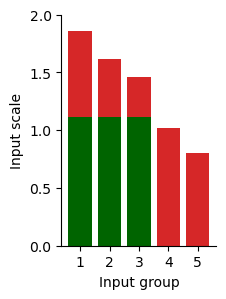

In [106]:
fig201, axs = plt.subplots(1,1,figsize=(2,3))

sig_bar = [sec.sig_sign*mean_std, sec.sig_sign*mean_std, 
                    sec.sig_sign*mean_std]
axs.bar(range(1,4),sig_bar,color='darkgreen')
axs.bar(range(1,4),[0.5*noises[0], 0.5*noises[1], 0.5*noises[3]],
        bottom=sig_bar,color='tab:red')
axs.bar(range(4,6),[stds[20], stds[40]/np.sqrt(20)],color='tab:red');

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_yticks((0,0.5,1,1.5,2));
# axs.set_ylabel(r'$\sigma_x$');
axs.set_xticks(range(1,6));

axs.set_ylabel(r'Input scale');
axs.set_xlabel(r'Input group');

In [107]:
fig201.savefig(path + 'fig_noise_input_std.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

In [108]:
w0 = np.random.randn(60,1)

In [109]:
nt = 100*100000

In [110]:
w_decay = 0.0

In [111]:
wno,yno,dum,dum,uno = sec.run_multiple(d.T, eta_adam = 0.001, rule="bcm+wd", permute=True, 
                                    w0norm = 3, w0=w0, hyk = 4, w_decay=w_decay,
                                    with_rec=False, ny=1, nt=nt, pos_w = True)

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [01:07<00:00, 1478.96it/s]


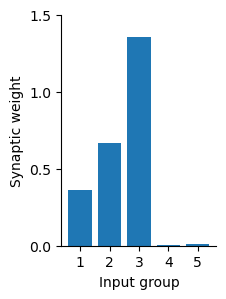

In [112]:
fig21, axs = plt.subplots(1,1,figsize=(2,3))

groups = [wno[-1,0:6,0].mean(),wno[-1,6:15,0].mean(),wno[-1,15:20,0].mean(),
         wno[-1,20:40,0].mean(), wno[-1,40:60,0].mean()]
axs.bar(range(1,6),groups,color='tab:blue')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.set_ylabel(r'Synaptic weight');
axs.set_xlabel(r'Input group');
axs.set_yticks((0,0.5,1,1.5));

axs.set_xticks(range(1,6));


In [113]:
fig21.savefig(path + 'fig_noise_ws.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

In [114]:
w22,y22,dum,dum,u22 = sec.run_multiple(d.T, eta_adam = 0.001, permute=False, 
                                    rule="ltp+wd", w_decay=1.5,
                                    w0 = w0, 
                                    with_rec=False, ny=1, nt=nt, pos_w=True)

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:40<00:00, 2471.83it/s]


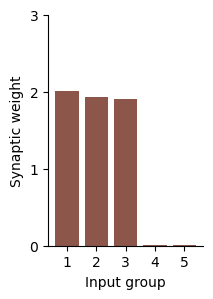

In [115]:
fig22, axs = plt.subplots(1,1,figsize=(2,3))

groups = [w22[-1,0:6,0].mean(),w22[-1,6:15,0].mean(),w22[-1,15:20,0].mean(),
         w22[-1,20:40,0].mean(), w22[-1,40:60,0].mean()]
axs.bar(range(1,6),groups,color='tab:brown')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.set_ylabel(r'$w$');
axs.set_yticks((0,1,2,3));

axs.set_xticks(range(1,6));


axs.set_ylabel(r'Synaptic weight');
axs.set_xlabel(r'Input group');

In [116]:
fig22.savefig(path + 'fig_noise_ws_control.pdf', format='pdf',bbox_inches = 'tight',transparent=True)

### output residual

In [117]:
w_decay = 0.0

In [118]:
wno3,yno3,dum,dum,uno3 = sec.run_multiple(d.T, eta_adam = 0.00, rule='bcm+wd',
                    permute=False, with_rec=False, ny=1, mb=1, w_decay=w_decay,
                    nt=100000, w0=wno[-1])

nbs: 100000


  0%|          | 0/99999 [00:00<?, ?it/s]

100%|██████████| 99999/99999 [00:31<00:00, 3137.70it/s]


In [119]:
ref = mean_sig[0,:100000]
output = uno3[:,0]
output = output/output.std()

In [120]:
a,b,dum,dum,dum = st.linregress(ref,output)
residual = output-a*ref-b
residual.std()

0.30342295330845337

In [121]:
corr1 = np.corrcoef(output,ref)[0,1]
snr1 = corr1**2/(1-corr1**2)
corr1, snr1

(0.9528559762133936, 9.861833410837953)

control output

In [122]:
wno4,yno4,dum,dum,uno4 = sec.run_multiple(d.T, eta_adam = 0.00,
                    permute=False, with_rec=False, ny=1, mb=1, 
                    nt=100000, w0=w22[-1])

nbs: 100000


  0%|          | 369/99999 [00:00<00:53, 1858.62it/s]

100%|██████████| 99999/99999 [00:36<00:00, 2750.29it/s]


In [123]:
ref2 = mean_sig[0,:100000]
output2 = uno4[:,0]#,:100000]
output2 = output2/output2.std()

In [124]:
a,b,dum,dum,dum = st.linregress(ref2,output2)
residual2 = output2-a*ref2-b
residual2.std()

0.3477488747200871

In [125]:
corr2 = np.corrcoef(output2,ref2)[0,1]
snr2 = corr2**2/(1-corr2**2)
corr2, snr2

(0.93758771329989, 7.269295914790768)

optimal residual

In [126]:
ref3 = d[:,:100000]
output3 = mean_sig[0]/mean_sig[0].std()
output3 = output3[:100000]

In [127]:
from sklearn import linear_model

In [128]:
clf = linear_model.LinearRegression()
clf.fit(ref3.T,output3)

LinearRegression()

In [129]:
residual3 = output3-clf.coef_@ref3-clf.intercept_
residual3.std()

0.32040971232123017

In [130]:
pred3 = clf.coef_@ref3+clf.intercept_

In [131]:
corr3 = np.corrcoef(pred3,output3)[0,1]
snr3 = corr3**2/(1-corr3**2)
corr3, snr3

(0.9530340021011628, 9.902011637600644)

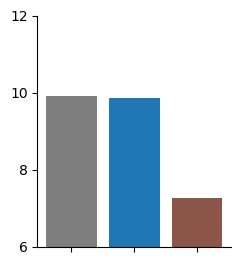

In [132]:
fig174, axs = plt.subplots(1,1,figsize=(2.5,3))

groups = [snr3, snr1, snr2]
axs.bar(range(1,4),groups,color=["tab:gray","tab:blue","tab:brown"])

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
# axs.set_ylabel(r'$w$');
axs.set_yticks((6,8,10,12));
axs.set_xticks(range(1,4));
# axs.set_xticklabels(["Optimal", "Hebb LTD", "Control"]);
axs.set_xticklabels([]);
plt.xticks(rotation=-30)
axs.set_ylim(6,12);

# axs.set_ylabel(r'Residual noise');
# axs.set_xlabel(r'Input group');

In [133]:
fig174.savefig(path + 'fig_noise_snrs.pdf', format='pdf',transparent=True,
              bbox_inches = 'tight',)